In [145]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from IPython.display import display
import matplotlib.pyplot as plt
import logging
import time
import tqdm

Data fra 1996-20

In [146]:
# Define the URL with all necessary parameters
url = "https://www.nasdaqomxnordic.com/webproxy/DataFeedProxy.aspx?SubSystem=History&Action=GetChartData&inst.an=id,nm,fnm,isin,tp,chp,ycp&FromDate=1996-08-08&ToDate=2024-08-08&json=true&timezone=CET&showAdjusted=false&app=/visitolur/soguleg_gogn-HistoryChart&DefaultDecimals=false&Instrument=DK0016268840"

# Define headers to mimic a real browser request
headers = {
    'User-Agent': 'Mozilla/5.0',
    'Referer': 'https://www.nasdaqomxnordic.com/visitolur/soguleg_gogn?languageId=5&Instrument=DK0016268840',
    'Origin': 'https://www.nasdaqomxnordic.com',
}

try:
    response = requests.get(url, headers=headers, timeout=30)
    response.raise_for_status()
    print("Request successful")
    print(response.text)
except requests.RequestException as e:
    print(f"Request failed: {e}")

# Extract the 'cp' (closing prices) data from the JSON response
data = response.json()
chart_data = data['data'][0]['chartData']['cp']

# Convert to a pandas DataFrame
df = pd.DataFrame(chart_data, columns=['Timestamp', 'Value'])

# Convert the timestamp to a datetime object
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')

# Display the DataFrame
print(df)


Request successful
{
  "@status": "1",
  "@ts": "1723211990507",
  "data": [
    {
      "instData": {
        "@id": "DK0016268840",
        "@nm": "OMXC20",
        "@fnm": "OMX Copenhagen 20",
        "@isin": "DK0016268840",
        "@tp": "I",
        "@chp": "2.020883",
        "@ycp": "0.0"
      },
      "chartData": {
        "cp": [
          [
            844905600000,
            126.29
          ],
          [
            844992000000,
            127.25
          ],
          [
            845251200000,
            127.62
          ],
          [
            845337600000,
            128.82
          ],
          [
            845424000000,
            128.32
          ],
          [
            845510400000,
            128.18
          ],
          [
            845596800000,
            128.64
          ],
          [
            845856000000,
            129.26
          ],
          [
            845942400000,
            128.88
          ],
          [
            8

Data Rens

In [147]:
# Generate a complete date range from October 1, 1996, to August 8, 2024, including weekends
full_date_range = pd.date_range(start='1996-10-01', end='2024-08-08', freq='D')

# Reindex the DataFrame to include the full date range, filling in missing dates
df.set_index('Timestamp', inplace=True)
df = df.reindex(full_date_range)

# Forward fill missing data to handle weekends and holidays
df['Value'] = df['Value'].ffill()

# Reset the index to include 'Timestamp' as a column again
df.reset_index(inplace=True)
df.rename(columns={'index': 'Timestamp'}, inplace=True)

# Define election dates
election_dates = [
    '1998-03-11',
    '2001-11-20',
    '2005-02-08',
    '2007-11-13',
    '2011-09-15',
    '2015-06-18',
    '2019-06-05',
    '2022-11-01'
]

# Convert election dates to datetime objects
election_dates = pd.to_datetime(election_dates)

# Add a new column 'Election' to indicate whether the row is an election date
df['Election'] = df['Timestamp'].isin(election_dates)

# Create a list to define the periods of "Rød" and "Blå"
periods = [
    ('1994-10-01', '1994-09-20', 'Blå'),
    ('1994-09-21', '2001-11-19', 'Rød'),
    ('2001-11-20', '2011-09-14', 'Blå'),
    ('2011-09-15', '2015-06-17', 'Rød'),
    ('2015-06-18', '2019-06-04', 'Blå'),
    ('2019-06-05', '2024-08-08', 'Rød')
]

# Initialize the new column
df['Color'] = pd.NA

# Assign "Rød" or "Blå" based on the defined periods
for start, end, color in periods:
    df.loc[(df['Timestamp'] >= start) & (df['Timestamp'] <= end), 'Color'] = color

# Forward fill missing data to handle weekends and holidays
df['Value'] = df['Value'].ffill()


# Display the DataFrame
print(df)


       Timestamp    Value  Election Color
0     1996-10-01      NaN     False   Rød
1     1996-10-02      NaN     False   Rød
2     1996-10-03      NaN     False   Rød
3     1996-10-04      NaN     False   Rød
4     1996-10-05      NaN     False   Rød
5     1996-10-06      NaN     False   Rød
6     1996-10-07      NaN     False   Rød
7     1996-10-08      NaN     False   Rød
8     1996-10-09      NaN     False   Rød
9     1996-10-10   126.29     False   Rød
10    1996-10-11   127.25     False   Rød
11    1996-10-12   127.25     False   Rød
12    1996-10-13   127.25     False   Rød
13    1996-10-14   127.62     False   Rød
14    1996-10-15   128.82     False   Rød
15    1996-10-16   128.32     False   Rød
16    1996-10-17   128.18     False   Rød
17    1996-10-18   128.64     False   Rød
18    1996-10-19   128.64     False   Rød
19    1996-10-20   128.64     False   Rød
20    1996-10-21   129.26     False   Rød
21    1996-10-22   128.88     False   Rød
22    1996-10-23   127.23     Fals

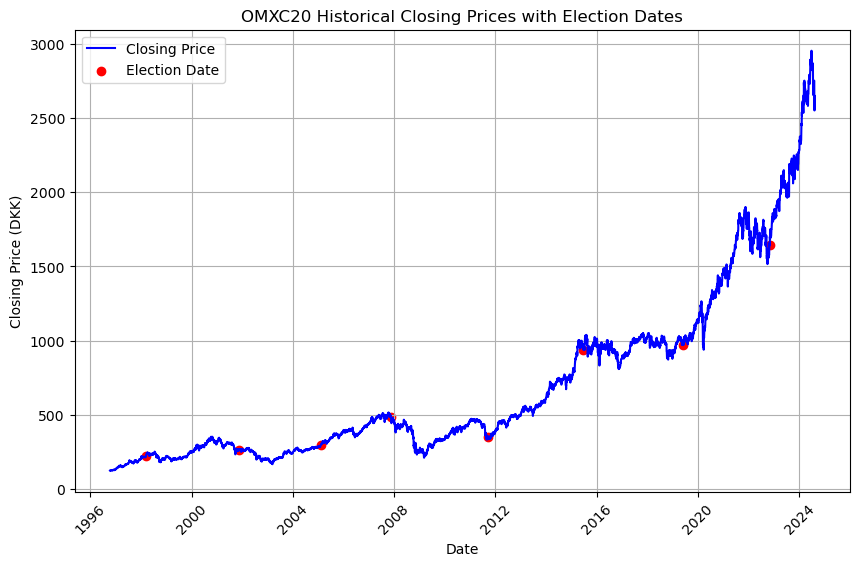

In [148]:

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Value'], label='Closing Price', color='blue')

# Highlight election dates
election_points = df[df['Election']]

plt.scatter(election_points['Timestamp'], election_points['Value'], color='red', label='Election Date')

# Adding titles and labels
plt.title('OMXC20 Historical Closing Prices with Election Dates')
plt.xlabel('Date')
plt.ylabel('Closing Price (DKK)')

# Formatting the date on the x-axis for better readability
plt.xticks(rotation=45)

# Adding a grid
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


Afkast

In [149]:
import pandas as pd

# Rename the DataFrame from df to data
data = df

# Ensure 'Timestamp' is set as the index for proper time series operations
data.set_index('Timestamp', inplace=True)

# Resample the data to get the last closing price of each month
monthly_data = data['Value'].resample('M').last()

# Calculate the monthly returns
data['Monthly Return'] = monthly_data.pct_change()

# Calculate direct returns for 3, 6, 9, and 12 months before each election date
data['Return_3M'] = pd.NA
data['Return_6M'] = pd.NA
data['Return_9M'] = pd.NA
data['Return_12M'] = pd.NA

for date in election_dates:
    if date in data.index:
        data.loc[date, 'Return_3M'] = (data.loc[date, 'Value'] / data.loc[date - pd.DateOffset(months=3), 'Value'] - 1) * 100
        data.loc[date, 'Return_6M'] = (data.loc[date, 'Value'] / data.loc[date - pd.DateOffset(months=6), 'Value'] - 1) * 100
        data.loc[date, 'Return_9M'] = (data.loc[date, 'Value'] / data.loc[date - pd.DateOffset(months=9), 'Value'] - 1) * 100
        data.loc[date, 'Return_12M'] = (data.loc[date, 'Value'] / data.loc[date - pd.DateOffset(months=12), 'Value'] - 1) * 100

# Reset the index to include 'Timestamp' as a column again
data.reset_index(inplace=True)

# Display the DataFrame with the new return columns
print(data[['Timestamp', 'Value', 'Monthly Return', 'Return_3M', 'Return_6M', 'Return_9M', 'Return_12M']].dropna())

print(data)

Empty DataFrame
Columns: [Timestamp, Value, Monthly Return, Return_3M, Return_6M, Return_9M, Return_12M]
Index: []
       Timestamp    Value  Election Color  Monthly Return  Return_3M  Return_6M  Return_9M Return_12M
0     1996-10-01      NaN     False   Rød             NaN       <NA>       <NA>       <NA>       <NA>
1     1996-10-02      NaN     False   Rød             NaN       <NA>       <NA>       <NA>       <NA>
2     1996-10-03      NaN     False   Rød             NaN       <NA>       <NA>       <NA>       <NA>
3     1996-10-04      NaN     False   Rød             NaN       <NA>       <NA>       <NA>       <NA>
4     1996-10-05      NaN     False   Rød             NaN       <NA>       <NA>       <NA>       <NA>
5     1996-10-06      NaN     False   Rød             NaN       <NA>       <NA>       <NA>       <NA>
6     1996-10-07      NaN     False   Rød             NaN       <NA>       <NA>       <NA>       <NA>
7     1996-10-08      NaN     False   Rød             NaN       <NA> 

Table

In [150]:
# Filtrer DataFrame for kun at inkludere rækker, hvor 'Election' er True
election_data = data[data['Election']]

# Udskriv den filtrerede DataFrame med relevante kolonner
print(election_data[['Timestamp', 'Value', 'Monthly Return', 'Return_3M', 'Return_6M', 'Return_9M', 'Return_12M']].dropna())


Empty DataFrame
Columns: [Timestamp, Value, Monthly Return, Return_3M, Return_6M, Return_9M, Return_12M]
Index: []


In [151]:
# Convert 'Timestamp' to date only (no time part)
election_data['Timestamp'] = election_data['Timestamp'].dt.date

# Juster displayindstillingerne
pd.set_option('display.max_columns', None)  # Vis alle kolonner
pd.set_option('display.expand_frame_repr', False)  # Forhindr brud på linjer
pd.set_option('display.max_colwidth', None)  # Vis fulde kolonnebredder

# Udskriv DataFrame
print(election_data)
display(election_data)

# Eksporter til Excel
election_data.to_excel('election_data.xlsx', index=False)


       Timestamp    Value  Election Color  Monthly Return  Return_3M  Return_6M  Return_9M Return_12M
526   1998-03-11   222.44      True   Rød             NaN  10.948177  26.999715  30.639572  37.759336
1876  2001-11-20   267.33      True   Blå             NaN -10.812704 -13.683769 -20.138018 -17.160918
3052  2005-02-08   301.06      True   Blå             NaN   7.717629  13.023238  18.939633   11.06766
4060  2007-11-13   486.84      True   Blå             NaN   0.335937  -0.644898   1.513825  14.485937
5462  2011-09-15   349.32      True   Rød             NaN -19.138889  -22.24374  -22.62266 -16.183986
6834  2015-06-18   941.18      True   Blå             NaN   3.451384  26.422824  22.210536  26.385476
8282  2019-06-05   973.31      True   Rød             NaN  -2.144494    4.77754  -1.940417  -1.571522
9527  2022-11-01  1647.03      True   Rød             NaN  -8.759383  -7.804305   -2.48548 -11.066054


C:\Users\theis\AppData\Local\Temp\ipykernel_8908\1049298780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_data['Timestamp'] = election_data['Timestamp'].dt.date


,Timestamp,Value,Election,Color,Monthly Return,Return_3M,Return_6M,Return_9M,Return_12M
526,1998-03-11,222.44,True,Rød,NaN,10.948177,26.999715,30.639572,37.759336
1876,2001-11-20,267.33,True,Blå,NaN,-10.812704,-13.683769,-20.138018,-17.160918
3052,2005-02-08,301.06,True,Blå,NaN,7.717629,13.023238,18.939633,11.06766
4060,2007-11-13,486.84,True,Blå,NaN,0.335937,-0.644898,1.513825,14.485937
5462,2011-09-15,349.32,True,Rød,NaN,-19.138889,-22.24374,-22.62266,-16.183986
6834,2015-06-18,941.18,True,Blå,NaN,3.451384,26.422824,22.210536,26.385476
8282,2019-06-05,973.31,True,Rød,NaN,-2.144494,4.77754,-1.940417,-1.571522
9527,2022-11-01,1647.03,True,Rød,NaN,-8.759383,-7.804305,-2.48548,-11.066054
